In [1]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *  
sqlContext = SQLContext(sc)

In [2]:
dataFile = sc.textFile("swift://notebooks.spark/JohnsonSubmission1.csv,swift://notebooks.spark/JohnsonSubmission2.csv")
dataFile.count()

dataFile2 = sc.textFile("swift://notebooks.spark/JohnsonSubmission5-6.csv,swift://notebooks.spark/JohnsonSubmission7.csv")
dataFile2.count()

dataFile3 = sc.textFile("swift://notebooks.spark/RoemerSubmission1.csv")
dataFile3.count()

4689

In [3]:
dataFile.take(5)

dataFile2.take(5)

dataFile3.take(5)

[u'Prefix,FirstName,MI,LastName,Suffix,Address1,Address2,City,State,Zip5,Employer,Occupation,DonationDate,Amount,AmountSubmittedForMatching,TotalThisSubmission,TotalAllSubmission,',
 u'Mr.,Jerry,J,Nichols,,15936,,Forney,TX,75126,,,4/24/2011,100.00,100.00,100.00,100.00,',
 u'Mr.,George,M,Schaffer,,341 Third Street,,Baton Rouge,LA,70801,,,4/25/2011,100.00,100.00,100.00,100.00,',
 u',Mark,,Seymour,,3003 Benham Ave,,Elkhart,IN,46517,,,4/26/2011,10.00,10.00,10.00,10.00,',
 u'Mr.,Jerry,,Dyess,Jr.,619 Sword Bridge Dr.,,Lewisville,TX,75056,,,4/27/2011,25.00,25.00,25.00,25.00,']

In [4]:
header = dataFile.first()
header

header2 = dataFile2.first()
header2

header3 = dataFile3.first()
header3

u'Prefix,FirstName,MI,LastName,Suffix,Address1,Address2,City,State,Zip5,Employer,Occupation,DonationDate,Amount,AmountSubmittedForMatching,TotalThisSubmission,TotalAllSubmission,'

In [5]:
schemaString = header.replace('"','')
schemaString

schemaString2 = header2.replace('"','')
schemaString2

schemaString3 = header3.replace('"','')
schemaString3

u'Prefix,FirstName,MI,LastName,Suffix,Address1,Address2,City,State,Zip5,Employer,Occupation,DonationDate,Amount,AmountSubmittedForMatching,TotalThisSubmission,TotalAllSubmission,'

In [6]:
import unicodedata
schemaString = unicodedata.normalize('NFKD', header).encode('ascii','ignore').replace('"','')  # get rid of the double-quotes
fields_temp = schemaString.split(',')
fields_temp = map(str.strip, fields_temp)
fields_temp = [w.replace(' ', '_') for w in fields_temp]
fields_temp




schemaString2 = unicodedata.normalize('NFKD', header2).encode('ascii','ignore').replace('"','')  # get rid of the double-quotes
fields_temp2 = schemaString2.split(',')
fields_temp2 = map(str.strip, fields_temp2)
fields_temp2 = [w.replace(' ', '_') for w in fields_temp2]
fields_temp2

schemaString3 = unicodedata.normalize('NFKD', header3).encode('ascii','ignore').replace('"','')  # get rid of the double-quotes
fields_temp3 = schemaString3.split(',')
fields_temp3 = map(str.strip, fields_temp3)
fields_temp3 = [w.replace(' ', '_') for w in fields_temp3]
fields_temp3

['Prefix',
 'FirstName',
 'MI',
 'LastName',
 'Suffix',
 'Address1',
 'Address2',
 'City',
 'State',
 'Zip5',
 'Employer',
 'Occupation',
 'DonationDate',
 'Amount',
 'AmountSubmittedForMatching',
 'TotalThisSubmission',
 'TotalAllSubmission',
 '']

In [7]:
fields = [StructField(field_name, StringType(), True) for field_name in fields_temp]
#fields

fields2 = [StructField(field_name, StringType(), True) for field_name in fields_temp2]
#fields2

fields3 = [StructField(field_name, StringType(), True) for field_name in fields_temp3]
fields3

[StructField(Prefix,StringType,true),
 StructField(FirstName,StringType,true),
 StructField(MI,StringType,true),
 StructField(LastName,StringType,true),
 StructField(Suffix,StringType,true),
 StructField(Address1,StringType,true),
 StructField(Address2,StringType,true),
 StructField(City,StringType,true),
 StructField(State,StringType,true),
 StructField(Zip5,StringType,true),
 StructField(Employer,StringType,true),
 StructField(Occupation,StringType,true),
 StructField(DonationDate,StringType,true),
 StructField(Amount,StringType,true),
 StructField(AmountSubmittedForMatching,StringType,true),
 StructField(TotalThisSubmission,StringType,true),
 StructField(TotalAllSubmission,StringType,true),
 StructField(,StringType,true)]

In [8]:
fields[1].name = 'Middle_Name'
fields[11].name = 'Amount_Submitted'
fields[12].name = 'Total_This_Submission'
fields[13].name = 'Total_All_Submissions'
fields[6].name = 'Postal_Code'
fields[9].name = 'Donation_Date'

fields3[1].name = 'First_Name'
fields3[2].name = 'Middle_Name'
fields3[3].name = 'Last_Name'
fields3[9].name = 'Postal_Code'
fields3[12].name = 'Donation_Date'
fields3[14].name = 'Amount_Submitted'
fields3[15].name = 'Total_This_Submission'
fields3[16].name = 'Total_All_Submissions'

len(fields)
len(fields2)
len(fields3)

18

In [9]:
schema = StructType(fields)
schema2 = StructType(fields2)
schema3 = StructType(fields3)

In [10]:
dataHeader = dataFile.filter(lambda l: "First_Name" in l)
dataHeader.collect()

dataHeader2 = dataFile2.filter(lambda l: "First_Name" in l)
dataHeader2.collect()

dataHeader3 = dataFile3.filter(lambda l: "First_Name" in l)
dataHeader3.collect()

[]

In [11]:
dataNoHeader = dataFile.subtract(dataHeader)
#dataNoHeader.count()

dataNoHeader2 = dataFile2.subtract(dataHeader2)
#dataNoHeader2.count()

dataNoHeader3 = dataFile3.subtract(dataHeader3)
#dataNoHeader3.count()\


In [12]:
data_temp = dataNoHeader.map(lambda k: k.split(",")).map(lambda p: (p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], p[9], p[10].replace(" ","").replace("","0").replace("/","").replace(",","").replace("\"","").replace("-",""), p[11].replace(" ","").replace("","0").replace(",","").replace("\"","").replace("-",""), p[12].replace(" ","").replace("","0").replace(",","").replace("\"","").replace("-",""), p[13].replace(" ","").replace("","0").replace(",","").replace("\"","").replace("-","")))

data_temp2 = dataNoHeader2.map(lambda k: k.split(",")).map(lambda p: (p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], p[9], p[10], p[11], p[12].replace(" ","").replace("","0").replace("/","").replace(",","").replace("\"","").replace("-",""), p[13].replace(" ","").replace("","0").replace(",","").replace("\"","").replace("-",""), p[14].replace(" ","").replace("","0").replace(",","").replace("\"","").replace("-",""), p[15].replace(" ","").replace("","0").replace(",","").replace("\"","").replace("-","")))


data_temp3 = dataNoHeader3.map(lambda k: k.split(",")).map(lambda p: (p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], p[9], p[10], p[11], p[12], p[13].replace(" ","").replace("","0").replace("/","").replace(",","").replace("\"","").replace("-",""), p[14].replace(" ","").replace("","0").replace(",","").replace("\"","").replace("-",""), p[15].replace(" ","").replace("","0").replace(",","").replace("\"","").replace("-",""), p[16].replace(" ","").replace("","0").replace(",","").replace("\"","").replace("-",""),p[17]))

In [13]:
data_df = sqlContext.createDataFrame(data_temp, schema)
data_df.show();

data_df2 = sqlContext.createDataFrame(data_temp2, schema2)
data_df2.show();

data_df3 = sqlContext.createDataFrame(data_temp3, schema3)
data_df3.show();

+----------+-----------+-----------+--------------------+---------------+--------------+-----------+--------------------+--------------------+-----------------+-----------------+----------------+---------------------+---------------------+
|First_Name|Middle_Name|  Last_Name|             Address|           City|         State|Postal_Code|            Employer|          Occupation|    Donation_Date|           Amount|Amount_Submitted|Total_This_Submission|Total_All_Submissions|
+----------+-----------+-----------+--------------------+---------------+--------------+-----------+--------------------+--------------------+-----------------+-----------------+----------------+---------------------+---------------------+
|    Steven|          J|   Damerell|   248 Silverleaf Dr|       Sterling|            VA|      20164|      US Government�|             Analyst|         1/9/2012|      04000.00000|     04000.00000|          04000.00000|          04000.00000|
|    manuel|           |    redondo|    

In [14]:
data_df.printSchema()
data_df2.printSchema()
data_df3.printSchema()

root
 |-- First_Name: string (nullable = true)
 |-- Middle_Name: string (nullable = true)
 |-- Last_Name: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal_Code: string (nullable = true)
 |-- Employer: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Donation_Date: string (nullable = true)
 |-- Amount: string (nullable = true)
 |-- Amount_Submitted: string (nullable = true)
 |-- Total_This_Submission: string (nullable = true)
 |-- Total_All_Submissions: string (nullable = true)

root
 |-- Prefix: string (nullable = true)
 |-- First_Name: string (nullable = true)
 |-- Middle_Name: string (nullable = true)
 |-- Last_Name: string (nullable = true)
 |-- Suffix: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal_Code: string (nullable = true)
 |-- Employer: string (nullable 

In [15]:
data_df
data_df.registerTempTable("Elec_Data1")

data_df2
data_df2.registerTempTable("Elec_Data2")

data_df3
data_df3.registerTempTable("Elec_Data_Roemer")

In [16]:
filter_df=sqlContext.sql("SELECT Null as Prefix, First_Name, Middle_Name, Last_Name, Null as Suffix, Address, City, State, Postal_Code, Employer, Occupation, Donation_Date, Amount, Amount_Submitted, Total_This_Submission, Total_All_Submissions FROM Elec_Data1 where Total_All_Submissions REGEXP '[^0-9]' and Total_This_Submission REGEXP '[^0-9]' and Amount_Submitted REGEXP '[^0-9]' and Amount REGEXP '[^0-9]' UNION SELECT * FROM Elec_Data2 where Total_All_Submissions REGEXP '[^0-9]' and Total_This_Submission REGEXP '[^0-9]' and Amount_Submitted REGEXP '[^0-9]' and Amount REGEXP '[^0-9]'")
filter_df.registerTempTable("Filter_Data")

filter_df_Roemer=sqlContext.sql("SELECT * FROM Elec_Data_Roemer where Total_All_Submissions REGEXP '[^0-9]' and Total_This_Submission REGEXP '[^0-9]' and Amount_Submitted REGEXP '[^0-9]' and Amount REGEXP '[^0-9]'")
filter_df_Roemer.registerTempTable("Filter_Data_Roemer")



In [17]:
df_name=sqlContext.sql("SELECT First_Name,Middle_Name,Last_Name, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data group by First_Name,Middle_Name,Last_Name order by SUM_ID desc, First_Name")
df_name.registerTempTable("Name_Fin_Data")
df_name.show()

df_Zip=sqlContext.sql("SELECT Postal_Code, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data where Postal_Code IS NOT NULL and Postal_Code <> '' group by Postal_Code order by SUM_ID desc, Postal_Code")
df_Zip.registerTempTable("Zip_Fin_Data")
df_Zip.show()

df_City=sqlContext.sql("SELECT City, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data where City IS NOT NULL and City <> '' group by City order by SUM_ID desc, City")
df_City.registerTempTable("City_Fin_Data")
df_City.show()

df_State=sqlContext.sql("SELECT State, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data where State IS NOT NULL and State <> '' group by State order by SUM_ID desc, State")
df_State.registerTempTable("State_Fin_Data")
df_State.show()

df_Occupation=sqlContext.sql("SELECT UPPER(Occupation) as Occupation, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data where Occupation IS NOT NULL and Occupation <> '' group by UPPER(Occupation) order by SUM_ID desc")
df_Occupation.registerTempTable("Occupation_Fin_Data")
df_Occupation.show()

df_name_Roemer=sqlContext.sql("SELECT First_Name,Middle_Name,Last_Name, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data_Roemer group by First_Name,Middle_Name,Last_Name order by SUM_ID desc, First_Name")
df_name_Roemer.registerTempTable("Name_Fin_Data_Roemer")
df_name_Roemer.show()

df_Zip_Roemer=sqlContext.sql("SELECT Postal_Code, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data_Roemer where Postal_Code IS NOT NULL and Postal_Code <> '' group by Postal_Code order by SUM_ID desc, Postal_Code")
df_Zip_Roemer.registerTempTable("Zip_Fin_Data_Roemer")
df_Zip_Roemer.show()

df_City_Roemer=sqlContext.sql("SELECT City, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data_Roemer where City IS NOT NULL and City <> '' group by City order by SUM_ID desc, City")
df_City_Roemer.registerTempTable("City_Fin_Data_Roemer")
df_City_Roemer.show()

df_State_Roemer=sqlContext.sql("SELECT State, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data_Roemer where State IS NOT NULL and State <> '' group by State order by SUM_ID desc, State")
df_State_Roemer.registerTempTable("State_Fin_Data_Roemer")
df_State_Roemer.show()

df_Occupation_Roemer=sqlContext.sql("SELECT UPPER(Occupation) as Occupation, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data_Roemer where Occupation IS NOT NULL and Occupation <> '' group by UPPER(Occupation) order by SUM_ID desc")
df_Occupation_Roemer.registerTempTable("Occupation_Fin_Data_Roemer")
df_Occupation_Roemer.show()

+----------+-----------+----------+---------+
|First_Name|Middle_Name| Last_Name|   SUM_ID|
+----------+-----------+----------+---------+
|    Louise|           |  Ferrebee|2010400.0|
|  Bradford|           |     Fults|1845000.0|
|    Sandra|         K.|      Rice|1805000.0|
|     DAVID|    MICHAEL|     BERKE|1640000.0|
|    Lester|          K|     Louie|1633350.0|
|      jean|           |   sheehan|1619350.0|
|    Andrew|          D|    Jarmon|1435000.0|
| Christina|           | Pongracic|1435000.0|
|     Jason|           |  Melehani|1435000.0|
|     Louis|           |Pontarelli|1435000.0|
|    Ernest|          R|     Lewis|1230000.0|
|   RAYMOND|         F.|     AGNEW|1218360.0|
|       Mel|           |    Pinney|1215250.0|
|   Zachary|          J|    Borden|1215250.0|
|    Warren|          C|   Spiller|1153450.0|
|     Nancy|           |       Dow|1140000.0|
|      Lisa|          C|      Roig|1078050.0|
|     James|          A|     Berns|1026000.0|
|      John|           |    Spicer

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib2
pd.__version__
%matplotlib inline
from matplotlib import cm


pd.pdf_name=df_name.toPandas()
pd.pdf_Zip=df_Zip.toPandas()
pd.pdf_City=df_City.toPandas()
pd.pdf_State=df_State.toPandas()
pd.pdf_Occupation=df_Occupation.toPandas()

pd.pdf_name_Roemer=df_name_Roemer.toPandas()
pd.pdf_Zip_Roemer=df_Zip_Roemer.toPandas()
pd.pdf_City_Roemer=df_City_Roemer.toPandas()
pd.pdf_State_Roemer=df_State_Roemer.toPandas()
pd.pdf_Occupation_Roemer=df_Occupation_Roemer.toPandas()


cs=cm.Set1(np.arange(30)/30.)

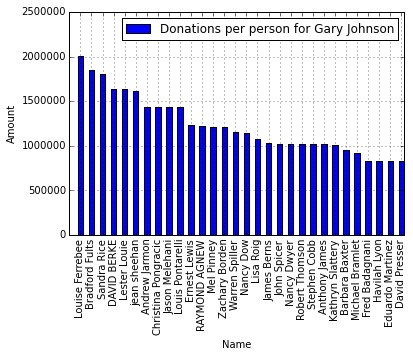

In [20]:
#name_list=pd.pdf_name['First_Name'].head(15).tolist()
#name_list=','.join('%s %s' for t in zip(pd.pdf_name['First_Name'].head(15).tolist(),pd.pdf_name['Last_Name'].head(15).tolist()))
#name_list = ', '.join('%s %s' % pair for pair in zip(['a','b','c'], ['p','q','r']))
new_data = zip(pd.pdf_name['First_Name'].head(30).tolist(),pd.pdf_name['Last_Name'].head(30).tolist())
name_list = (' '.join(w) for w in new_data)
name_amounts=pd.pdf_name['SUM_ID'].head(30).tolist()
data_names = {'Donations per person for Gary Johnson':pd.Series(name_amounts, index=name_list)}
df_name_plot = pd.DataFrame(data_names)
ax = df_name_plot.plot(kind='bar')
ax.set_xlabel("Name")
ax.set_ylabel("Amount")

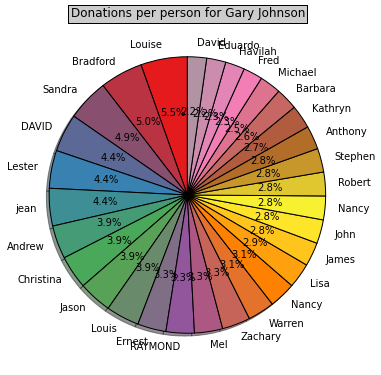

In [21]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = pd.pdf_name['First_Name'].head(30).tolist()
fracs = pd.pdf_name['SUM_ID'].head(30).tolist()
#fracs = [15, 30, 45, 10]
#explode=(0, 0.05, 0, 0)

pie(fracs, labels=labels, colors = cs,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Donations per person for Gary Johnson', bbox={'facecolor':'0.8', 'pad':5})

show()

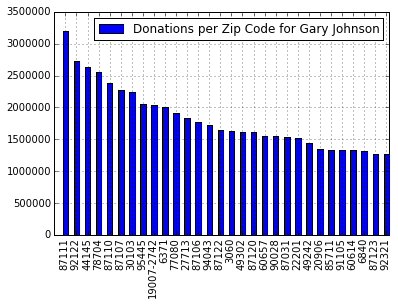

In [22]:
Zip_list=pd.pdf_Zip['Postal_Code'].head(30).tolist()
Zip_amounts=pd.pdf_Zip['SUM_ID'].head(30).tolist()
data_zip = {'Donations per Zip Code for Gary Johnson' : pd.Series(Zip_amounts, index=Zip_list)}
df_plot_zip = pd.DataFrame(data_zip)
df_plot_zip.plot(kind='bar')

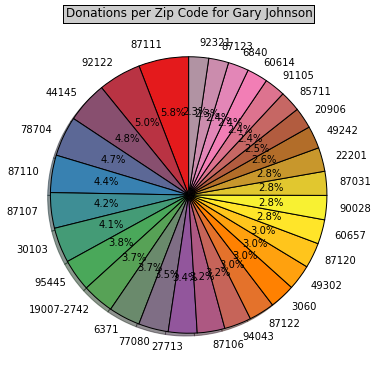

In [23]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = pd.pdf_Zip['Postal_Code'].head(30).tolist()
fracs = pd.pdf_Zip['SUM_ID'].head(30).tolist()
#fracs = [15, 30, 45, 10]
#explode=(0, 0.05, 0, 0)

pie(fracs, labels=labels, colors = cs,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Donations per Zip Code for Gary Johnson', bbox={'facecolor':'0.8', 'pad':5})

show()

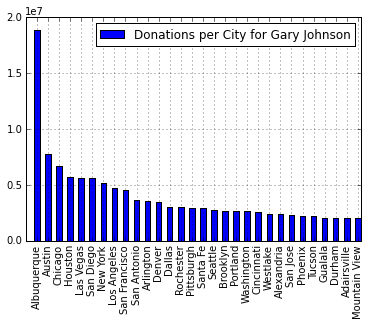

In [24]:
City_list=pd.pdf_City['City'].head(30).tolist()
City_amounts=pd.pdf_City['SUM_ID'].head(30).tolist()
data_City = {'Donations per City for Gary Johnson' : pd.Series(City_amounts, index=City_list)}
df_plot_city = pd.DataFrame(data_City)
df_plot_city.plot(kind='bar')

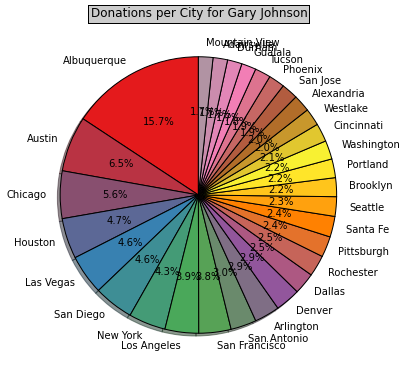

In [25]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = pd.pdf_City['City'].head(30).tolist()
fracs = pd.pdf_City['SUM_ID'].head(30).tolist()
#fracs = [15, 30, 45, 10]
#explode=(0, 0.05, 0, 0)

pie(fracs, labels=labels, colors = cs,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Donations per City for Gary Johnson', bbox={'facecolor':'0.8', 'pad':5})

show()

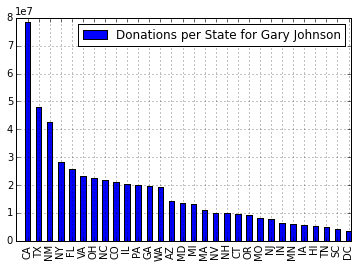

In [26]:
State_list=pd.pdf_State['State'].head(30).tolist()
State_amounts=pd.pdf_State['SUM_ID'].head(30).tolist()
data_State = {'Donations per State for Gary Johnson' : pd.Series(State_amounts, index=State_list)}
df_plot_State = pd.DataFrame(data_State)
df_plot_State.plot(kind='bar')

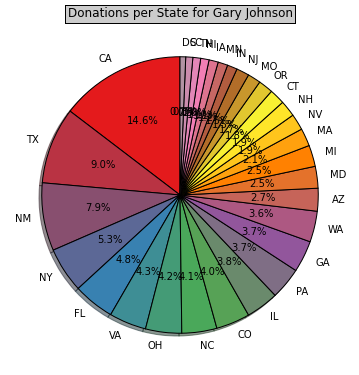

In [27]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = pd.pdf_State['State'].head(30).tolist()
fracs = pd.pdf_State['SUM_ID'].head(30).tolist()
#fracs = [15, 30, 45, 10]
#explode=(0, 0.05, 0, 0)

pie(fracs, labels=labels, colors = cs,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Donations per State for Gary Johnson', bbox={'facecolor':'0.8', 'pad':5})

show()

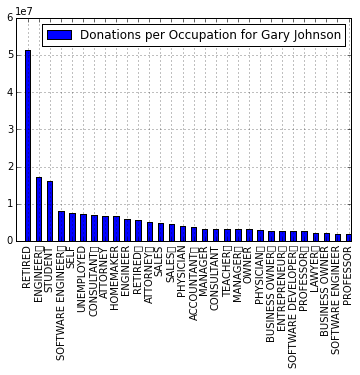

In [28]:
Occupation_list=pd.pdf_Occupation['Occupation'].head(30).tolist()
Occupation_amounts=pd.pdf_Occupation['SUM_ID'].head(30).tolist()
data_Occupation = {'Donations per Occupation for Gary Johnson' : pd.Series(Occupation_amounts, index=Occupation_list)}
df_plot_Occupation = pd.DataFrame(data_Occupation)
df_plot_Occupation.plot(kind='bar')

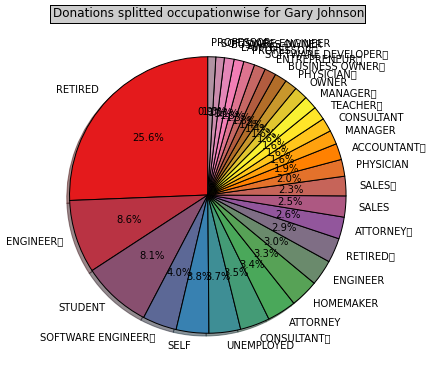

In [29]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = pd.pdf_Occupation['Occupation'].head(30).tolist()
fracs = pd.pdf_Occupation['SUM_ID'].head(30).tolist()
#fracs = [15, 30, 45, 10]
#explode=(0, 0.05, 0, 0)

pie(fracs, labels=labels, colors = cs,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Donations splitted occupationwise for Gary Johnson', bbox={'facecolor':'0.8', 'pad':5})

show()


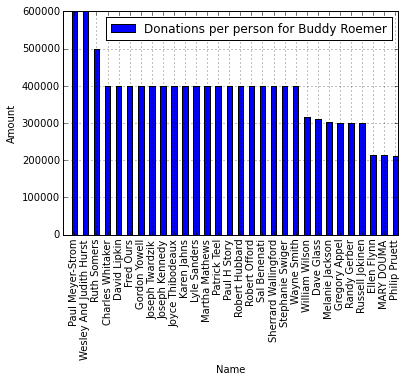

In [30]:
new_data_Roemer = zip(pd.pdf_name_Roemer['First_Name'].head(30).tolist(),pd.pdf_name_Roemer['Last_Name'].head(30).tolist())
name_list_Roemer = (' '.join(w) for w in new_data_Roemer)



name_amounts_Roemer =pd.pdf_name_Roemer['SUM_ID'].head(30).tolist()
data_names_Roemer = {'Donations per person for Buddy Roemer':pd.Series(name_amounts_Roemer, index=name_list_Roemer)}
df_name_plot = pd.DataFrame(data_names_Roemer)
ax = df_name_plot.plot(kind='bar')
ax.set_xlabel("Name")
ax.set_ylabel("Amount")


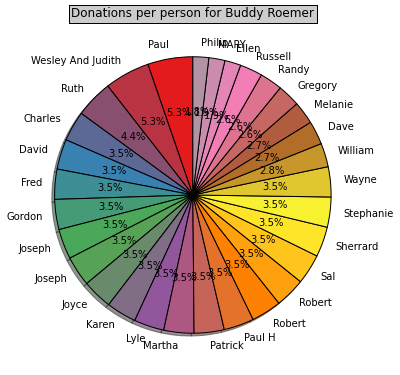

In [31]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = pd.pdf_name_Roemer['First_Name'].head(30).tolist()
fracs = pd.pdf_name_Roemer['SUM_ID'].head(30).tolist()
#fracs = [15, 30, 45, 10]
#explode=(0, 0.05, 0, 0)

pie(fracs, labels=labels, colors = cs,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Donations per person for Buddy Roemer', bbox={'facecolor':'0.8', 'pad':5})

show()

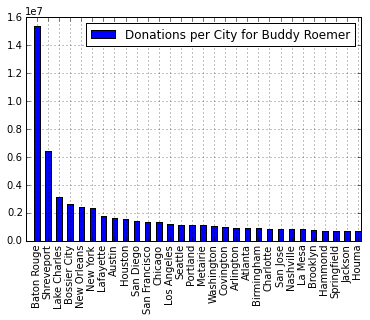

In [32]:
City_list_Roemer=pd.pdf_City_Roemer['City'].head(30).tolist()
City_amounts_Roemer=pd.pdf_City_Roemer['SUM_ID'].head(30).tolist()
data_City_Roemer = {'Donations per City for Buddy Roemer' : pd.Series(City_amounts_Roemer, index=City_list_Roemer)}
df_plot_city = pd.DataFrame(data_City_Roemer)
df_plot_city.plot(kind='bar')


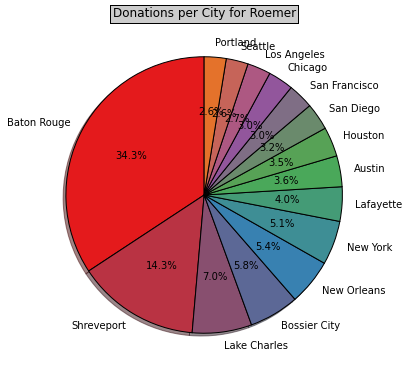

In [36]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = pd.pdf_City_Roemer['City'].head(15).tolist()
fracs = pd.pdf_City_Roemer['SUM_ID'].head(15).tolist()
#fracs = [15, 30, 45, 10]
#explode=(0, 0.05, 0, 0)

pie(fracs, labels=labels, colors = cs,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Donations per City for Roemer', bbox={'facecolor':'0.8', 'pad':5})

show()

In [37]:
#df_City_Roemer=sqlContext.sql("SELECT City, SUM(Total_All_Submissions) as SUM_ID FROM Filter_Data_Roemer where City IS NOT NULL and City <> '' group by City order by SUM_ID desc, City")
#sqlContext.sql("SELECT * FROM Zip_Fin_Data_Roemer order by SUM_ID desc").show()
#sqlContext.sql("SELECT * FROM Zip_Fin_Data order by SUM_ID desc").show()
df_City_Comp=sqlContext.sql("SELECT CF.City, CF.SUM_ID as Gary, CFR.SUM_ID as Buddy FROM City_Fin_Data CF, City_Fin_Data_Roemer CFR where CF.City = CFR.City")

df_City_Comp.show();
#df_City_Roemer.show()

+--------------+-----------+---------+
|          City|       Gary|    Buddy|
+--------------+-----------+---------+
|         Essex|   100000.0| 100000.0|
|       Killeen|   100000.0| 102050.0|
|     Camp Hill|     7050.0|     50.0|
| North Andover|     2110.0|   2050.0|
|      Rockport|       50.0| 300000.0|
|     Lafayette|   910000.0|1803050.0|
|    Healdsburg|   205000.0| 102050.0|
|          York|106200.0105|   6000.0|
|        Aurora|  1343250.0|   9100.0|
|    Twin Falls|  1146270.0| 100000.0|
|    Alpharetta| 830150.081| 208100.0|
|          Yuma|     8050.0|     60.0|
|Jeffersonville|     2050.0|   5000.0|
|          Kent|      100.0|   2050.0|
|      Oak Park|   523050.0|   2050.0|
|    Livingston|   207050.0|   2050.0|
|    Georgetown|   113150.0| 309100.0|
|     Asheville|    23260.0| 300000.0|
|        Dedham|     5000.0|   5000.0|
|  Merrillville|     5000.0| 100050.0|
+--------------+-----------+---------+



ValueError: If using all scalar values, you must must pass an index